In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Grab and process the raw data.
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon.columns = ['message', 'spam']

In [3]:
amazon.head()

,message,spam
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


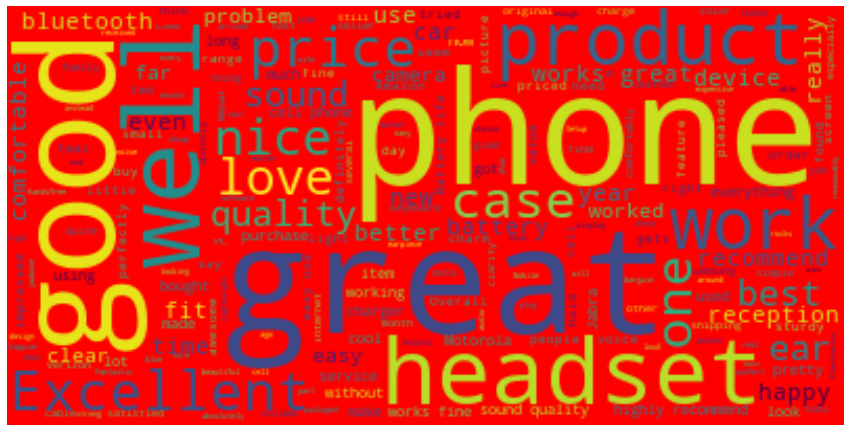

In [4]:
# Generate a word cloud image for only spam messages
wordcloud = WordCloud(background_color="red").generate(" ".join(amazon.loc[amazon.spam== 1, 'message']))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

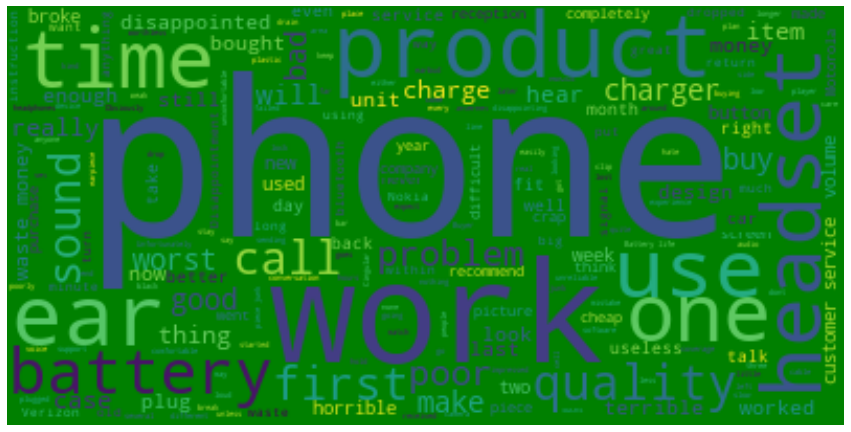

In [5]:
# Generate a word cloud image for only real messages
wordcloud = WordCloud(background_color="green").generate(" ".join(amazon.loc[amazon.spam== 0, 'message']))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [6]:
#Use most common words in spam wordcloud, but not real wordcloud, as keywords
keywords= ['headset', 'love', 'Motorola', 'good', 'well', 'great', 
           'Excellent', 'case', 'price', 'great', 'winner', 'free']

for key in keywords:
    amazon[str(key)] = amazon.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [7]:
#Transform spam into bool
amazon['spam']= (amazon['spam']== 1)

In [8]:
#inspect dataset w/ new changes
amazon.head()

,message,spam,headset,love,Motorola,good,well,great,Excellent,case,price,winner,free
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,True,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False


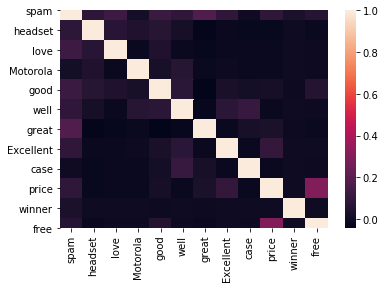

In [9]:
#Check for overlapping correlation of variables
sns.heatmap(amazon.corr())

Great! No strong correlations b/w variables means variables are reasonably independent. 

In [10]:
#Define data & target for dataset
data= amazon[keywords]
target= amazon['spam']

In [11]:
#Check model efficiency
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()

#Fit model to data
bnb.fit(data, target)

#Classify
predictor= bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    amazon.shape[0],
    (target != predictor).sum()
))

Number of mislabeled points out of a total 1000 points : 395


In [12]:
print('The Amazon model was {}% inaccurate in detecting spam.'.format((target != predictor).sum()*100/amazon.shape[0]))

The Amazon model was 39.5% inaccurate in detecting spam.


In [13]:
#import IMDB data for further testing 
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['message', 'spam']

In [14]:
imdb.head()

,message,spam
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [15]:
#Create bool columns for each keyword
for key in keywords:
    imdb[str(key)] = imdb.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [16]:
#Transform spam into bool
imdb['spam']= (imdb['spam']== 1)

In [17]:
#Add capitalized messages to spam list
imdb['allcaps'] = imdb.message.str.isupper()

In [18]:
#Redefine data & target for new dataset
data= imdb[keywords + ['allcaps']]
target=imdb['spam']
bnb=BernoulliNB()

#Fit model to data
bnb.fit(data, target)

#Classify
predictor= bnb.predict(data)
target= imdb['spam']

print("Number of mislabeled points out of a total {} points : {}".format(
    imdb.shape[0],
    (target != predictor).sum()
))

Number of mislabeled points out of a total 748 points : 339


In [19]:
print('The Amazon model was {}% inaccurate in detecting spam in the IMDB dataset.'.format((target != predictor).sum()*100/imdb.shape[0]))

The Amazon model was 45.32085561497326% inaccurate in detecting spam in the IMDB dataset.


In [20]:
#Check efficiency of classifier using Yelp dataset
yelp = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp.columns = ['message', 'spam']

In [21]:
yelp.head()

,message,spam
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [22]:
#Create bool columns for each keyword
for key in keywords:
    yelp[str(key)] = yelp.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [23]:
#Transform spam into bool
yelp['spam']= (yelp['spam']== 1)

In [24]:
#Add capitalized messages to spam list
yelp['allcaps'] = yelp.message.str.isupper()

In [25]:
#Redefine data & target for new dataset
data= yelp[keywords + ['allcaps']]
target= yelp['spam']

In [26]:
#Fit model to data
bnb.fit(data, target)

#Classify
predictor= bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    yelp.shape[0],
    (target != predictor).sum()
))

Number of mislabeled points out of a total 1000 points : 416


In [27]:
print('The Amazon model was {}% inaccurate in detecting spam in the Yelp dataset.'.format((target != predictor).sum()*100/yelp.shape[0]))

The Amazon model was 41.6% inaccurate in detecting spam in the Yelp dataset.


The model was only about 61% accurate in predicting spam in the original dataset, and fared worse in the other two datasets. To make the model more accurate, I would propose filtering out messages with ellipses(...) and filtering through the provider's email addresses could further increase accuracy